In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,scale
from sklearn.decomposition import PCA
plt.style.use('seaborn-whitegrid')
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  

In [163]:
df=pd.read_excel('./机器标签.xlsx')
df

,主键,机器编号,销量,销售额,日均销售额,点位日均销量,点位日,件单价,sku动销率,退款率,吐货失败率,缺货率,时间
0,021112462021-07-04,2111246,81,3364.00,841.00,20.250000,4,41.53,1.0000,0.0000,0.0000,0.3750,2021-07-05 05:09:49
1,021002032021-07-04,2100203,538,5200.90,742.99,76.857143,7,9.67,0.8431,0.0435,0.0127,0.3652,2021-07-05 05:09:47
2,021103482021-07-04,2110348,262,1816.64,259.52,37.428571,7,6.93,0.8919,0.0507,0.0000,0.2570,2021-07-05 05:09:47
3,075512182021-07-04,7551218,356,1550.13,258.36,59.333333,6,4.35,0.8214,0.0000,0.0028,0.1337,2021-07-05 05:09:47
4,021109192021-07-04,2110919,254,1748.66,249.81,36.285714,7,6.88,0.8780,0.0662,0.0110,0.2765,2021-07-05 05:09:47
5,025102422021-07-04,2510242,324,1529.50,218.50,46.285714,7,4.72,0.9200,0.0092,0.0000,0.2527,2021-07-05 05:09:47
6,028103742021-07-04,2810374,295,1516.67,216.67,42.142857,7,5.14,0.9565,0.0000,0.0000,0.3452,2021-07-05 05:09:47
7,010105952021-07-04,1010595,300,1504.13,214.88,42.857143,7,5.01,0.9630,0.0000,0.0000,0.1091,2021-07-05 05:09:49
8,021110622021-07-04,2111062,276,1378.96,196.99,39.428571,7,5.00,0.9630,0.0036,0.0036,0.3651,2021-07-05 05:09:47
9,075511852021-07-04,7551185,289,1361.94,194.56,41.285714,7,4.71,0.8800,0.0000,0.0000,0.0824,2021-07-05 05:09:47


In [98]:
df1=df.iloc[:,2:12]
df1

,销量,销售额,日均销售额,点位日均销量,点位日,件单价,sku动销率,退款率,吐货失败率,缺货率
0,81,3364.00,841.00,20.250000,4,41.53,1.0000,0.0000,0.0000,0.3750
1,538,5200.90,742.99,76.857143,7,9.67,0.8431,0.0435,0.0127,0.3652
2,262,1816.64,259.52,37.428571,7,6.93,0.8919,0.0507,0.0000,0.2570
3,356,1550.13,258.36,59.333333,6,4.35,0.8214,0.0000,0.0028,0.1337
4,254,1748.66,249.81,36.285714,7,6.88,0.8780,0.0662,0.0110,0.2765
5,324,1529.50,218.50,46.285714,7,4.72,0.9200,0.0092,0.0000,0.2527
6,295,1516.67,216.67,42.142857,7,5.14,0.9565,0.0000,0.0000,0.3452
7,300,1504.13,214.88,42.857143,7,5.01,0.9630,0.0000,0.0000,0.1091
8,276,1378.96,196.99,39.428571,7,5.00,0.9630,0.0036,0.0036,0.3651
9,289,1361.94,194.56,41.285714,7,4.71,0.8800,0.0000,0.0000,0.0824


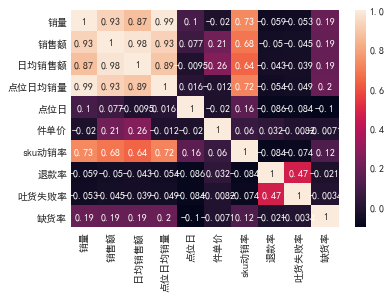

In [99]:
# 相关性检验，检测数据的相关性

sns.heatmap(df1.corr(),annot=True)

In [101]:
# 标准化处理
data=scale(df1)
# data
data=pd.DataFrame(data)
data
# data.to_csv('./标准化文件.csv',encoding='gb18030')

,0,1,2,3,4,5,6,7,8,9
0,1.128547,15.754168,26.365636,2.664526,-4.289326,23.358672,2.615008,-0.236017,-0.154586,2.431545
1,13.045366,24.844762,23.193791,12.875408,0.187118,3.086272,1.870021,0.913773,0.238643,2.338888
2,5.848337,8.096472,7.547511,5.763223,0.187118,1.342820,2.101731,1.104083,-0.154586,1.315879
3,8.299499,6.777547,7.509971,9.714437,-1.305030,-0.298824,1.766985,-0.236017,-0.067890,0.150102
4,5.639728,7.760047,7.233272,5.557072,0.187118,1.311006,2.035732,1.513778,0.186006,1.500247
5,7.465061,6.675451,6.220003,7.360888,0.187118,-0.063394,2.235155,0.007157,-0.154586,1.275223
6,6.708851,6.611957,6.160780,6.613593,0.187118,0.203850,2.408463,-0.236017,-0.154586,2.149792
7,6.839232,6.549898,6.102851,6.742437,0.187118,0.121132,2.439326,-0.236017,-0.154586,-0.082486
8,6.213404,5.930447,5.523887,6.123986,0.187118,0.114769,2.439326,-0.140862,-0.043120,2.337942
9,6.552394,5.846217,5.445246,6.458980,0.187118,-0.069757,2.045228,-0.236017,-0.154586,-0.334929


In [102]:
# 进行主成分分析，选择主成分的数量

pca = PCA(n_components = 10)
pca.fit(data)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [103]:
# 解释累计变异程度
pca.explained_variance_ratio_

array([4.44318246e-01, 1.49401159e-01, 1.09345373e-01, 1.07155620e-01,
       8.40727267e-02, 5.32391993e-02, 4.09637409e-02, 9.82789809e-03,
       1.47151535e-03, 2.04522072e-04])

In [104]:
sum(pca.explained_variance_ratio_)

1.0

In [153]:
# 重新选择主成分个数进行建模
pca = PCA(n_components=3).fit(data)
# fit_transform 表示将生成降维后的数据
new_data = pca.fit_transform(data)

# 权重值

new_data1=pd.DataFrame(new_data)
new_data1

,0,1,2
0,23.454055,5.607803,8.416289
1,34.897073,4.383881,1.563796
2,13.446788,1.845810,0.360541
3,15.388870,1.275362,0.665961
4,12.922735,2.318678,0.338278
5,13.672765,0.886277,0.185452
6,13.118922,0.754418,0.813634
7,12.937228,0.593706,-0.577853
8,12.085132,0.799501,0.872621
9,11.866089,0.489995,-0.710223


In [154]:
pca.explained_variance_ratio_

ratio=pd.DataFrame(pca.explained_variance_ratio_)
ratio.iloc[1][0]
# ratio

0.1494011586623546

In [155]:
# pd.DataFrame(pca.components_).T

In [156]:
new_data1['PCA']=(new_data1[0]*ratio.iloc[0][0])+(new_data1[1]*ratio.iloc[1][0])+(new_data1[2]*ratio.iloc[2][0])
new_data1

,0,1,2,PCA
0,23.454055,5.607803,8.416289,12.179159
1,34.897073,4.383881,1.563796,16.331357
2,13.446788,1.845810,0.360541,6.289843
3,15.388870,1.275362,0.665961,7.100916
4,12.922735,2.318678,0.338278,6.125209
5,13.672765,0.886277,0.185452,6.227748
6,13.118922,0.754418,0.813634,6.030654
7,12.937228,0.593706,-0.577853,5.773761
8,12.085132,0.799501,0.872621,5.584508
9,11.866089,0.489995,-0.710223,5.267866


In [164]:
results = df.join(pd.DataFrame(new_data1, columns=['PCA'])) # 与原来的数据拼接
results

,主键,机器编号,销量,销售额,日均销售额,点位日均销量,点位日,件单价,sku动销率,退款率,吐货失败率,缺货率,时间,PCA
0,021112462021-07-04,2111246,81,3364.00,841.00,20.250000,4,41.53,1.0000,0.0000,0.0000,0.3750,2021-07-05 05:09:49,12.179159
1,021002032021-07-04,2100203,538,5200.90,742.99,76.857143,7,9.67,0.8431,0.0435,0.0127,0.3652,2021-07-05 05:09:47,16.331357
2,021103482021-07-04,2110348,262,1816.64,259.52,37.428571,7,6.93,0.8919,0.0507,0.0000,0.2570,2021-07-05 05:09:47,6.289843
3,075512182021-07-04,7551218,356,1550.13,258.36,59.333333,6,4.35,0.8214,0.0000,0.0028,0.1337,2021-07-05 05:09:47,7.100916
4,021109192021-07-04,2110919,254,1748.66,249.81,36.285714,7,6.88,0.8780,0.0662,0.0110,0.2765,2021-07-05 05:09:47,6.125209
5,025102422021-07-04,2510242,324,1529.50,218.50,46.285714,7,4.72,0.9200,0.0092,0.0000,0.2527,2021-07-05 05:09:47,6.227748
6,028103742021-07-04,2810374,295,1516.67,216.67,42.142857,7,5.14,0.9565,0.0000,0.0000,0.3452,2021-07-05 05:09:47,6.030654
7,010105952021-07-04,1010595,300,1504.13,214.88,42.857143,7,5.01,0.9630,0.0000,0.0000,0.1091,2021-07-05 05:09:49,5.773761
8,021110622021-07-04,2111062,276,1378.96,196.99,39.428571,7,5.00,0.9630,0.0036,0.0036,0.3651,2021-07-05 05:09:47,5.584508
9,075511852021-07-04,7551185,289,1361.94,194.56,41.285714,7,4.71,0.8800,0.0000,0.0000,0.0824,2021-07-05 05:09:47,5.267866


In [166]:
results.to_csv('./结论2.csv',encoding='gb18030')
